In [107]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import math
import pandas as pd

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import GlyphRenderer, LinearColorMapper
from bokeh.io import push_notebook
from numba import jit, njit

from ipywidgets import interact

from scipy import optimize

output_notebook()

Loading BokehJS ...

In [3]:
def PolyModel(x, a, b, c):
	return a + (b*x) + (c*x*x)

def LinModel(x, m, c):
	return (m*x)+c

In [4]:
test_temp = 25

#print(sys.argv)

my_data1 = np.genfromtxt("test.csv", delimiter=',') # Temp dep M and C constants 
log_data = np.genfromtxt("test2.csv", delimiter=',') # Test Data

ehum = log_data[1:,1] #E+E Hum,
etemp = log_data[1:,2] #E+E Temp,
vhum = log_data[1:,3] #Vaisala Hum,
vtemp = log_data[1:,4] #Vaisala Temp,
shum = log_data[1:,5] #SGS Hum,
stemp = log_data[1:,6] #SGS Temp,
sraw = log_data[1:,7] #SGS RAW,
scalc = log_data[1:,8] #SGS Calc,
shum2 = log_data[1:,9] #SGS 2 Hum,
stemp2 = log_data[1:,10] #SGS 2 Temp,
sraw2 = log_data[1:,11] #SGS 2 RAW,
scalc2 = log_data[1:,12] #SGS 2 Calc

indep_data = my_data1[0:,2]
dep_data = my_data1[0:,0]

[-1.57334417e+02  5.40256091e+05]


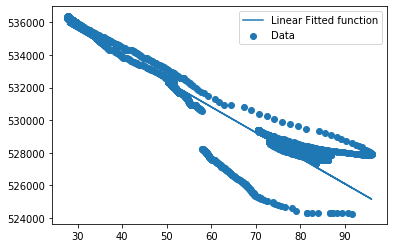

In [4]:
paramsLin, params_covarianceLin = optimize.curve_fit(LinModel, vhum, sraw2)

print(paramsLin)

plt.figure(figsize=(6, 4))

plt.scatter(vhum, sraw2, label='Data')
plt.plot(vhum, LinModel(vhum, paramsLin[0], paramsLin[1]),label='Linear Fitted function')

plt.legend(loc='best')
plt.show()

[ -1.06521938 -34.69982342]
[-2.48226197e+01 -2.12503197e+00  2.18988067e-02]


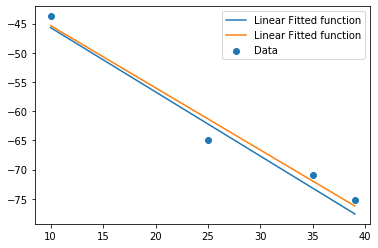

In [5]:
paramsLin, params_covarianceLin = optimize.curve_fit(LinModel, indep_data, dep_data)
paramsPoly, params_covariancePoly = optimize.curve_fit(PolyModel, indep_data, dep_data)

print(paramsLin)
print(paramsPoly)

plt.figure(figsize=(6, 4))
plt.scatter(indep_data, dep_data, label='Data')

plt.plot(indep_data, LinModel(indep_data, -1.1, paramsLin[1]),label='Linear Fitted function')
plt.plot(indep_data, LinModel(indep_data, paramsLin[0], paramsLin[1]),label='Linear Fitted function')

plt.legend(loc='best')

plt.show()

In [59]:
logData2 = pd.read_csv("test2.csv")
logData2.head(5)

,Time,E+E Hum,E+E Temp,Vaisala Hum,Vaisala Temp,SGS Hum,SGS Temp,SGS RAW,SGS Calc,SGS 2 Hum,SGS 2 Temp,SGS 2 RAW,SGS 2 Calc
0,11:26:14,69.40,23.02,68.1,23.0,61.1,23.0,531411,26761.98,NaN,NaN,NaN,NaN
1,11:26:15,69.39,23.02,68.1,23.0,61.1,23.0,531411,26761.98,NaN,NaN,NaN,NaN
2,11:26:16,69.38,23.02,68.1,23.0,61.1,23.0,531410,26761.93,NaN,NaN,NaN,NaN
3,11:26:17,69.38,23.02,68.1,23.0,61.1,23.0,531410,26761.93,NaN,NaN,NaN,NaN
4,11:26:18,69.39,23.02,68.1,23.0,61.1,23.0,531411,26761.98,NaN,NaN,NaN,NaN


In [60]:
print(log_data2)

log_data2 = logData2.to_numpy()

ehum = log_data2[1:,1] #E+E Hum,
etemp = log_data2[1:,2] #E+E Temp,
vhum = log_data2[1:,3] #Vaisala Hum,
vtemp = log_data2[1:,4] #Vaisala Temp,
shum = log_data2[1:,5] #SGS Hum,
stemp = log_data2[1:,6] #SGS Temp,
sraw = log_data2[1:,7] #SGS RAW,

[['11:26:14' 69.4 23.02 ... nan nan nan]
 ['11:26:15' 69.39 23.02 ... nan nan nan]
 ['11:26:16' 69.38 23.02 ... nan nan nan]
 ...
 ['17:55:02' 93.62 30.51 ... nan nan nan]
 ['17:55:03' 93.61 30.51 ... nan nan nan]
 ['17:55:04' 93.61 30.51 ... nan nan nan]]


In [149]:
def M_from_ms(arr):
    dep = arr[:,0]
    indep = arr[:,2]
    
    paramsLin, params_covarianceLin = optimize.curve_fit(LinModel, indep, dep)
    return paramsLin
    
def C_from_cs(arr):
    dep = arr[:,1]
    indep = arr[:,2]
    
    paramsLin, params_covarianceLin = optimize.curve_fit(LinModel, indep, dep)
    
    return paramsLin
    

In [180]:
arr_log_data2 = log_data2[1:]

In [181]:
def hum_for_temp(t, arr):
    new_arr = np.array([[0,0,0]])

    for item in arr:
        temper = item[6] - t
        if (abs(temper) < 3):
            #print(item)
            new_arr = np.append(new_arr,[[item[3],item[6],item[7]]],axis = 0)

    log_dat = new_arr

    vhum = log_dat[1:,0] #Vaisala Hum,
    stemp = log_dat[1:,1] #Vaisala Hum,
    sraw = log_dat[1:,2] #SGS RAW,

    paramsLin, params_covarianceLin = optimize.curve_fit(LinModel, vhum, sraw)

    #print(paramsLin)
    return np.append(paramsLin, t)

In [182]:
def calc_hum(Freq, _M, _C, temp):
    M = _M[0]*temp + _M[1]
    C = _C[0]*temp + _C[1]

    Humidity = (Freq - C)/ M
    return Humidity

In [183]:
data_arr = arr_log_data2

arr = np.array([hum_for_temp(10, data_arr), 
                hum_for_temp(15, data_arr), 
                hum_for_temp(20, data_arr), 
                hum_for_temp(25, data_arr), 
                hum_for_temp(35, data_arr), 
                hum_for_temp(40, data_arr)
               ])

p = figure(title="At Temp " + str(temp), x_axis_label='Humidity', y_axis_label='Raw')

#p.line(vhum, sraw, legend_label="Data", line_width=2, color="red")

for item in arr:
    print(item)
    p.line(vhum, LinModel(vhum, item[0], item[1]), legend_label="Linear", line_width=2)

#show(p)    

print()
#print("M m ", [0], "c ", M_from_ms(arr)[1])
#print("C m ", C_from_cs(arr)[0], "c ", C_from_cs(arr)[1])

_M = M_from_ms(arr)
_C = C_from_cs(arr)

TypeError: for_temp() takes 1 positional argument but 2 were given

In [184]:
arr = arr_log_data2

new_arr = np.array([[0,0,0,0,0]])

for item in arr:
    new_arr = np.append(new_arr,[[item[3],
                                  item[6], 
                                  item[7], 
                                  calc_hum(item[7], _M, _C, item[6]),
                                  abs(item[3] - calc_hum(item[7], _M, _C, item[6])) 
                                 ]], axis = 0 
                       )

log_dat = new_arr

vhum = log_dat[1:,0] 
stemp = log_dat[1:,1] 
sraw = log_dat[1:,2] 
scalc = log_dat[1:,3] 
diff = log_dat[1:,4] 

p = figure(title="Calculated Humidity vs Vaisala Humidity ", x_axis_label='Vais Hum', y_axis_label='SGS Hum')

p.line(vhum, scalc, legend_label="Linear", line_width=2)

show(p)

mean_diff = np.mean(diff)

p = figure(title="Diff bw Vais and SGS, Mean: " + str(mean_diff), x_axis_label='Vais Hum', y_axis_label='SGS Hum')

p.line(vhum, diff, legend_label="Linear", line_width=2)

show(p)


In [179]:
new_arr = np.array([[0,0,0,0]])
temp = 20

arr = log_data2[1:]

count = -1
for item in arr:
    count = count + 1
    temper = item[6] - temp
    if (abs(temper) < 140):
        #print(item)
        new_arr = np.append(new_arr,[[item[3],item[6],item[7], count]],axis = 0)
    
log_dat = new_arr

vhum = log_dat[1:,0] #Vaisala Hum,
stemp = log_dat[1:,1] #Vaisala Hum,
sraw = log_dat[1:,2] #SGS RAW,
count = log_dat[1:,3] #SGS RAW,

paramsLin, params_covarianceLin = optimize.curve_fit(LinModel, vhum, sraw)

print(paramsLin)

#plt.figure(figsize=(6, 4))

#plt.scatter(vhum, sraw, label='Data')
#plt.plot(vhum, LinModel(vhum, paramsLin[0], paramsLin[1]),label='Linear Fitted function')

#plt.legend(loc='best')
#plt.show()

p = figure(title="At Temp " + str(temp), x_axis_label='Humidity', y_axis_label='Raw')

p.line(count, sraw, legend_label="Data", line_width=2, color="red")
#p.line(vhum, LinModel(vhum, paramsLin[0], paramsLin[1]), legend_label="Linear", line_width=2)

show(p)

[-1.99874994e+02  5.43542254e+05]
